# Introduzione a Pandas e Numpy

# Contenuti
 - [Numpy](#Numpy) 
 - [Pandas](#Pandas)
     - [Serie](#Series)
     - [Dataframe](#DataFrames)

- [Tabelle](#Tables)
- [Grafici](#ChartVisualization)
- [Importazione dati](#DataImport)
    - [CSV](#CSV)
    - [JSON](#JSON)
    - [HTML](#HTML)
    - [Excel](#Excel)

# Numpy

## Aggregati con Numpy

Numpy è un modulo di Python **ottimizzato** per la manipolazione di **grandi quantità di dati**. Aggiunge supporto a grandi matrici e array multidimensionali insieme a una vasta collezione di funzioni matematiche di alto livello per poter operare efficientemente su queste strutture dati.

Per approfondire https://numpy.org/

## Esempio di utilizzo di Numpy

Di seguito un esempio di come si possa disegnare visualizzare l'andamento di una funzione utilizzando `numpy` e `matplotlib`

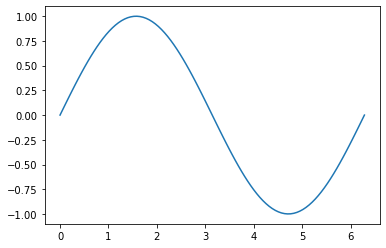

In [124]:
import numpy as np
import matplotlib.pyplot as plt
# Genera 100 punti tra 0 e 6.28 equidistanti
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

Possiamo utlizzare le due funzioni di Python `time` e `timeit` per valutare la differenza di performance tra l'implementazione di python e quella ottimizzata di Numpy.

Creiamo una lista di un milione di interi e calcoliamone la somma con i due metodi `sum` nativo di python e `np.sum` di Numpy

In [125]:
interi_1M = np.random.randint(100000, size=1000000)

print ('Utilizzo sum')
%time sum(interi_1M)
# %timeit sum(interi_1M)

print()

print ('Utilizzo np.sum')
%time np.sum(interi_1M)
# %timeit np.sum(interi_1M)

Utilizzo sum
CPU times: user 69.2 ms, sys: 35.9 ms, total: 105 ms
Wall time: 54.2 ms

Utilizzo np.sum
CPU times: user 731 µs, sys: 503 µs, total: 1.23 ms
Wall time: 750 µs


50037545211

In [126]:
%%html
<style>
table {float:left}
</style>

## Funzioni di aggregazione

Di seguito un breve elenco di alcune delle funzioni disponibili in Numpy


 **Function Name**  | **NaN-safe Version**  | **Description**             
--------------------|-----------------------|-----------------------------
 np.sum             | np.nansum             | Compute sum of elements     
 np.prod            | np.nanprod            | Compute product of elements 
 np.mean            | np.nanmean            | Compute mean of elements    
 np.std             | np.nanstd             | Compute standard deviation  
 np.var             | np.nanvar             | Compute variance            
 np.min             | np.nanmin             | Find minimum value          
 np.max             | np.nanmax             | Find maximum value          
 np.argmin          | np.nanargmin          | Find index of minimum value 
 np.argmax          | np.nanargmax          | Find index of maximum value 

# Pandas

E' una libreria software per Pyton per la manipolazione e l'analisi dei dati

Rilasciato sotto la licenza BSD

Il nome deriva dal termine "panel data"

Per una breve introduzione potete riferirvi a https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html



## Series

Sequenze 1-dimensionali di elementi omogenei

Ogni elemento è associato ad un indice (non necessariamente numerico)

Se l'indice non viene specificato ne viene creato uno automaticamente con un intero progressivo

Una serie può essere facilmente creata a partire da una lista o da un dizionario

Per approfondire: https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [128]:
# Serie senza indice esplicito creata a partire da una lista di float
s1 = pd.Series([2.8, 13.1, 14.2])
print(s1)

0     2.8
1    13.1
2    14.2
dtype: float64


In [129]:
# Serie di interi con un indice di stringhe esplicitamente creato
pd.Series([12, 15, 9], index=['lunedì', 'martedì', 'mercoledì'])

lunedì       12
martedì      15
mercoledì     9
dtype: int64

In [130]:
# Serie creata a partire da un dizionario
pd.Series({'Mauro':27, 'Luca':18, 'Anna':42})

Mauro    27
Luca     18
Anna     42
dtype: int64

Recupero di valori dalle serie

Possiamo leggere i valori inseriti e l'indice

In [131]:
s = pd.Series([12, 15, 9], index=['lunedì', 'martedì', 'mercoledì'])

# Stampa i valori
print(s.values)

# Stampa gli indici
print(s.index)

[12 15  9]
Index(['lunedì', 'martedì', 'mercoledì'], dtype='object')


L'indice implicito (numerico) è sempre presente, anche quando ne viene definito uno esplicitamente

Possiamo accedere ai singoli valori utilizzanto le due funzioni `loc` per gli indici espliciti e `iloc` per quelli impliciti

Per approfondire https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [132]:
s = pd.Series([12, 15, 9, 7 ,35], index=['lunedì', 'martedì', 'mercoledì','giovedì','venerdì'])

# Indice esplicito
print(s.loc['martedì'])

# Indice implicito
print(s.iloc[1])

15
15


In [133]:
# Si possono anche leggere più elementi contigui
print(s.loc['martedì':'giovedì']) # indice esplicito (elemento finale incluso)

martedì      15
mercoledì     9
giovedì       7
dtype: int64


In [134]:
print(s.iloc[1:3]) # # indice implicito (elemento finale escluso)

martedì      15
mercoledì     9
dtype: int64


# DataFrames

Sono delle tabelle in cui le colonne sono delle serie che condividono lo stesso indice

Possono essere creati a partire da un dizionario, da una lista di dizionari, da un array bidimensionale e molto altro

In [135]:
anni = pd.Series([35, 42, 29], index=['Mauro', 'Luca', 'Anna'])
altezza = pd.Series([178, 152, 180], index=['Mauro', 'Luca', 'Anna'])
peso = pd.Series([70, 65, 75], index=['Mauro', 'Luca', 'Anna'])
dati_persone = pd.DataFrame({'Anni':anni, 'Altezza':altezza,'Peso':peso})
print(dati_persone)

       Anni  Altezza  Peso
Mauro    35      178    70
Luca     42      152    65
Anna     29      180    75


In [136]:
# Senza indice esplicito ...
anni = pd.Series([35, 42, 29])
altezza = pd.Series([178, 152, 180])
peso = pd.Series([70, 65, 75])
df = pd.DataFrame({'Anni':anni, 'Altezza':altezza,'Peso':peso})
print(df)

   Anni  Altezza  Peso
0    35      178    70
1    42      152    65
2    29      180    75


Si possono anche creare serie con indici non omogenei, i valori mancanti vengono marcati come NaN. Questo può risultare molto comodo in caso si vogliano riconciliare archivi disomogenei.

In [137]:
anni = pd.Series([35, 42, 29], index=['Mauro', 'Luca', 'Anna'])
altezze = pd.Series([178, 152, 180], index=['Luca', 'Anna', 'Mauro'])
pesi = pd.Series([70, 65, 75, 48], index=['Romeo', 'Tiziana', 'Stefano', 'Anna'])
dati_persone_sparsi = pd.DataFrame({'Anni':anni, 'Altezza':altezze,'Peso':pesi})
print(dati_persone_sparsi)

         Anni  Altezza  Peso
Anna     29.0    152.0  48.0
Luca     42.0    178.0   NaN
Mauro    35.0    180.0   NaN
Romeo     NaN      NaN  70.0
Stefano   NaN      NaN  75.0
Tiziana   NaN      NaN  65.0


Altri metodi molto più comodi per la creazione dei DataFrames sono la creazione di dataframe a partire da files

La lista completa la trovate su https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

# Missing values

Pandas offre molte funzioni per la **bonifica dei dati** sono utilissime in caso di importazione di dati "sporchi" o incompleti

- isnull()
- notnull()
- dropna()
- fillna()

Si possono eliminare i dati nulli, sostituire con un valore di default, con il valore precedente, con il successivo o con un valore calcolato.

Si possono eliminare intere colonne o righe con valori non accettabili.

Per approfondire: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

# Tables

Si può anche personalizzare la visualizzazione dei dati tabellari con i fogli di stile.

Per approfondire: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [138]:
dati_persone

,Anni,Altezza,Peso
Mauro,35,178,70
Luca,42,152,65
Anna,29,180,75


In [139]:
s = dati_persone.style\
      .format('{:.0f}')\
      .set_table_styles([{
        'selector': '',
        'props':  'border-collapse: separate;'
      },{
        'selector': 'caption',
        'props': 'caption-side: bottom; font-size:1.3em; text-align: center'
      },{
        'selector': '.index_name',
        'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
      },{
        'selector': 'th:not(.index_name)',
        'props': 'background-color: #c2f0c2; color: black;'
      },{
        'selector': 'th.col_heading',
        'props': 'text-align: center;'
      },{
        'selector': 'th.col_heading.level0',
        'props': 'font-size: 1.5em;'
      },{
        'selector': 'td',
        'props': 'text-align: center; font-weight:bold;'
      },{
        'selector': '.true',
        'props': 'background-color: #00000;'
      },{
        'selector': '.false',
        'props': 'background-color: #ffffcc;'
      },{
        'selector': 'td:hover',
        'props': 'background-color: #ffcc80;'
      }])\
      .set_td_classes(pd.DataFrame([['true', 'false', 'true']], 
                                    index=dati_persone.index, columns=dati_persone.columns))\
      .set_caption("Raccolta dati persone")\
      .set_tooltips(pd.DataFrame([['Tooltip1', 'Tooltip2', 'Tooltip3'],['1','2','3'],['4','5','6']], 
                                    index=dati_persone.index, columns=dati_persone.columns),
                   css_class='pd-tt', props=
    'visibility: hidden; position: absolute; z-index: 1; border: 1px solid #000066;'
    'background-color: white; color: #000066; font-size: 0.8em;' 
    'transform: translate(0px, -24px); padding: 0.6em; border-radius: 0.5em;')

s

,Anni,Altezza,Peso
Mauro,35,178,70
Luca,42,152,65
Anna,29,180,75


# ChartVisualization

Una volta terminata l'analisi dei dati è molto semplice produrre dei grafici riepilogativi.

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

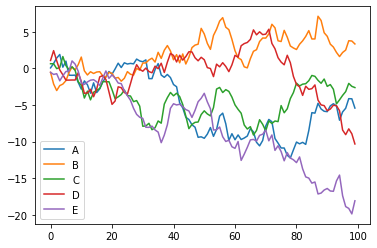

In [140]:
df = pd.DataFrame(np.random.randn(100, 5), columns=list('ABCDE'))
df=df.cumsum() # Return cumulative sum over a DataFrame or Series axis
df.plot()
plt.show()

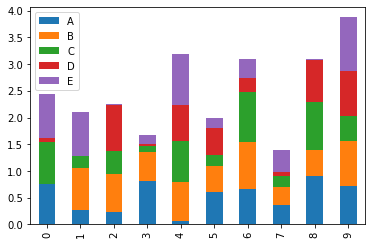

In [141]:
df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))
df.plot.bar(stacked=True)
plt.show()

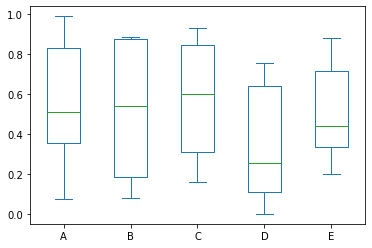

In [142]:
df = pd.DataFrame(np.random.rand(7, 5), columns=list('ABCDE'))
df.plot.box()
plt.show()

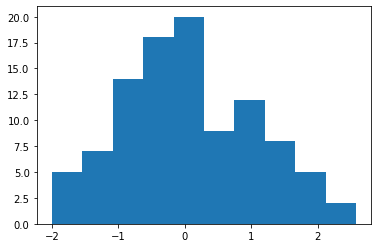

In [143]:
data = pd.Series(np.random.normal(size=100))
data.hist(grid=False)
plt.show()

# DataImport

Con Pandas è facile importare dati da diverse fonti.

## CSV


In [144]:
p_csv = pd.read_csv('Sample_data/persone/persone.csv', sep=';')
p_csv.describe()

,Html,Css,Php,C#,Sql,Js
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.861111,4.027778,3.740741,2.564815,4.157407,2.851852
std,3.009202,2.917746,3.049040,2.536733,3.072829,2.685422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,6.000000,5.000000,5.000000,1.500000,5.000000,2.000000
75%,7.000000,7.000000,6.000000,4.000000,7.000000,6.000000
max,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000


In [145]:
p_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nome            108 non-null    object
 1   Cognome         108 non-null    object
 2   Sesso           108 non-null    object
 3   Datadinascita   108 non-null    object
 4   Cittadinascita  108 non-null    object
 5   Regione         108 non-null    object
 6   Html            108 non-null    int64 
 7   Css             108 non-null    int64 
 8   Php             108 non-null    int64 
 9   C#              108 non-null    int64 
 10  Sql             108 non-null    int64 
 11  Js              108 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 10.2+ KB


In [146]:
p_csv.head()

,Nome,Cognome,Sesso,Datadinascita,Cittadinascita,Regione,Html,Css,Php,C#,Sql,Js
0,Roberto,Benigni,M,01/06/1965,Udine,FVG,6,7,9,7,5,4
1,Claudio,Bisio,M,20/01/1962,Belluno,VEN,1,2,3,4,5,6
2,Francesca,Cipriani,F,19/08/1959,Belluno,VEN,7,7,6,7,6,6
3,Susanna,Messaggio,F,29/05/2000,Verona,VEN,7,7,6,4,6,6
4,Aldo,Biscardi,M,21/11/1989,Aosta,VDA,5,3,1,1,7,3


## JSON


In [147]:
p_json = pd.read_json('Sample_data/persone/persone.json')
p_json.describe()

,Html,Css,Php,C#,Sql,Js
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.861111,4.027778,3.740741,2.564815,4.157407,2.851852
std,3.009202,2.917746,3.049040,2.536733,3.072829,2.685422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,6.000000,5.000000,5.000000,1.500000,5.000000,2.000000
75%,7.000000,7.000000,6.000000,4.000000,7.000000,6.000000
max,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000


In [148]:
p_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nome            108 non-null    object
 1   Cognome         108 non-null    object
 2   Sesso           108 non-null    object
 3   Datadinascita   108 non-null    object
 4   Cittadinascita  108 non-null    object
 5   Regione         108 non-null    object
 6   Html            108 non-null    int64 
 7   Css             108 non-null    int64 
 8   Php             108 non-null    int64 
 9   C#              108 non-null    int64 
 10  Sql             108 non-null    int64 
 11  Js              108 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 10.2+ KB


In [149]:
p_json.head()

,Nome,Cognome,Sesso,Datadinascita,Cittadinascita,Regione,Html,Css,Php,C#,Sql,Js
0,Roberto,Benigni,M,01/06/1965,Udine,FVG,6,7,9,7,5,4
1,Claudio,Bisio,M,20/01/1962,Belluno,VEN,1,2,3,4,5,6
2,Francesca,Cipriani,F,19/08/1959,Belluno,VEN,7,7,6,7,6,6
3,Susanna,Messaggio,F,29/05/2000,Verona,VEN,7,7,6,4,6,6
4,Aldo,Biscardi,M,21/11/1989,Aosta,VDA,5,3,1,1,7,3


## HTML

In [150]:
html_tables = pd.read_html('Sample_data/persone/persone.html')
p_html = html_tables[0]
p_html.describe()

,Html,Css,Php,C#,Sql,Js
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.861111,4.027778,3.740741,2.564815,4.157407,2.851852
std,3.009202,2.917746,3.049040,2.536733,3.072829,2.685422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,6.000000,5.000000,5.000000,1.500000,5.000000,2.000000
75%,7.000000,7.000000,6.000000,4.000000,7.000000,6.000000
max,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000


In [151]:
p_html.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nome            108 non-null    object
 1   Cognome         108 non-null    object
 2   Sesso           108 non-null    object
 3   Datadinascita   108 non-null    object
 4   Cittadinascita  108 non-null    object
 5   Regione         108 non-null    object
 6   Html            108 non-null    int64 
 7   Css             108 non-null    int64 
 8   Php             108 non-null    int64 
 9   C#              108 non-null    int64 
 10  Sql             108 non-null    int64 
 11  Js              108 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 10.2+ KB


In [152]:
p_html.head()

,Nome,Cognome,Sesso,Datadinascita,Cittadinascita,Regione,Html,Css,Php,C#,Sql,Js
0,Roberto,Benigni,M,01/06/1965,Udine,FVG,6,7,9,7,5,4
1,Claudio,Bisio,M,20/01/1962,Belluno,VEN,1,2,3,4,5,6
2,Francesca,Cipriani,F,19/08/1959,Belluno,VEN,7,7,6,7,6,6
3,Susanna,Messaggio,F,29/05/2000,Verona,VEN,7,7,6,4,6,6
4,Aldo,Biscardi,M,21/11/1989,Aosta,VDA,5,3,1,1,7,3


## Excel

In [153]:
p_xls = pd.read_excel('Sample_data/persone/persone.xlsx')
p_xls.describe()

,Html,Css,Php,C#,Sql,Js
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.861111,4.027778,3.740741,2.564815,4.157407,2.851852
std,3.009202,2.917746,3.049040,2.536733,3.072829,2.685422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,6.000000,5.000000,5.000000,1.500000,5.000000,2.000000
75%,7.000000,7.000000,6.000000,4.000000,7.000000,6.000000
max,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000


In [154]:
p_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Nome              108 non-null    object        
 1   Cognome           108 non-null    object        
 2   Sesso             108 non-null    object        
 3   Data di nascita   108 non-null    datetime64[ns]
 4   Citta di nascita  108 non-null    object        
 5   Regione           108 non-null    object        
 6   Html              108 non-null    int64         
 7   Css               108 non-null    int64         
 8   Php               108 non-null    int64         
 9   C#                108 non-null    int64         
 10  Sql               108 non-null    int64         
 11  Js                108 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 10.2+ KB


In [155]:
p_xls.head()

,Nome,Cognome,Sesso,Data di nascita,Citta di nascita,Regione,Html,Css,Php,C#,Sql,Js
0,Roberto,Benigni,M,1965-06-01,Udine,FVG,6,7,9,7,5,4
1,Claudio,Bisio,M,1962-01-20,Belluno,VEN,1,2,3,4,5,6
2,Francesca,Cipriani,F,1959-08-19,Belluno,VEN,7,7,6,7,6,6
3,Susanna,Messaggio,F,2000-05-29,Verona,VEN,7,7,6,4,6,6
4,Aldo,Biscardi,M,1989-11-21,Aosta,VDA,5,3,1,1,7,3
